# 1.) Pull in Data and Convert ot Monthly

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [29]:
df

,Adj Close
Date,
1980-12-31,0.117887
1981-01-31,0.097591
1981-02-28,0.091546
1981-03-31,0.084637
1981-04-30,0.098023
...,...
2023-09-30,170.984741
2023-10-31,170.545319
2023-11-30,189.949997


In [30]:
df['diff'] = df['Adj Close'].diff().shift(-1)

In [32]:
df['target']=np.sign(df['diff'] )
df['Premium']=0.08*df['Adj Close']
df.head()

,Adj Close,diff,target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


In [16]:
df['target'].dropna()

Date
1980-12-31   -1.0
1981-01-31   -1.0
1981-02-28   -1.0
1981-03-31    1.0
1981-04-30    1.0
             ... 
2023-08-31   -1.0
2023-09-30   -1.0
2023-10-31    1.0
2023-11-30    1.0
2023-12-31   -1.0
Freq: M, Name: target, Length: 517, dtype: float64

# 3.) Pull in X data, normalize and build a LogReg on column 2

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
X = pd.read_csv(r"C:\Users\blaman\Desktop\mqe\ml lab\Week 2\Xdata.csv", index_col="Date", parse_dates=["Date"])

In [35]:
y = df.loc[:"2023-09-30","target"].copy()
df = df.loc[:"2023-09-30",].copy()

In [36]:
logreg=LogisticRegression()
logreg.fit(X,y)
y_pred=logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [42]:
df['Pred']=y_pred

In [51]:

df['profits']=0
df.loc[(df['Pred']==1)&(df['target']==1),'profits']=df['Premium']
df.loc[(df['Pred']==1)&(df['target']==-1),'profits']=100*df['diff']+df['Premium']
df.loc[(df['Pred']==-1)&(df['target']==--1),'profits']=100*df['diff']+df['Premium']
df.loc[(df['Pred']==-1)&(df['target']==1),'profits']=df['Premium']

# 5.) Plot profits over time

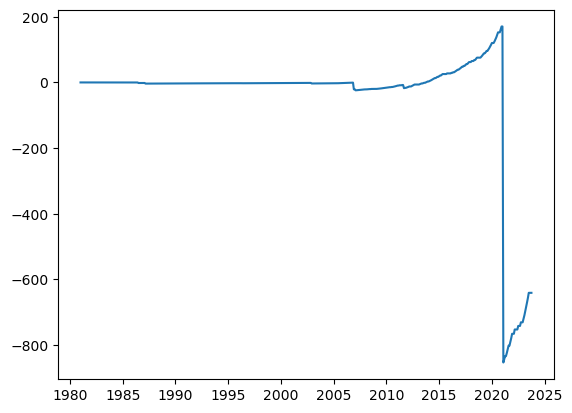

In [52]:
plt.plot(np.cumsum(df['profits']))
plt.show()

### short write up about how you see your skills are valuable to PJ

I think modeling and analytical skills are very important for PJ’s social media work. I saw that people can buy tickets on his website with the help of blockchain technology. I believe that by analyzing people's ticket buying behavior on the website, we can get data on people's interest in movies. By analyzing this data, it will be very useful for them to produce more interesting products.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.